Each report should include the following sections:

### Title
### Introduction:
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
clearly state the question you tried to answer with your project
identify and fully describe the dataset that was used to answer the question
### Methods & Results:
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data 
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
performs the data analysis
creates a visualization of the analysis 
note: all figures should have a figure number and a legend
### Discussion:
summarize what you found
discuss whether this is what you expected to find
discuss what impact could such findings have
discuss what future questions could this lead to
### References
You may include references if necessary, as long as they all have a consistent citation style.

Predicting `experience` from `age` and `average session length`.


### DSCI 100 Final Report Group Project

Members: Ewan Maclachlan, Islam Soliman, Sun Lo, Vicky Tan

Group: 004-27

TA: Jordan Yu

In [2]:
library(tidyverse)
library(lubridate)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Part 1: Introduction

#### Background Information
This report explores the relations between the attributes of Minecraft players and their expertise level in the game. The raw datasets `players_data` and `sessions_data` will be used in the analysis. The data was collected by Pacific Laboratory of Artificial Intelligence (PLAI), a research group in Computer Science at the University of British Columbia led by Frank Wood.

#### Question of Interest
- Can `average_session_length` and `Age` predict the `experience` of the Minecraft player?

#### Data Description of `players_data`
- details the identity of players and was collected through the recording of players' actions in Minecraft servers
- 196 observations
- 7 variables

##### Name of Variables and Types
- `experience` is character type, meaning it represents text values
- `subscribe` is logical type, meaning it contains boolean values, TRUE or FALSE, for each corresponding observation
- `hashedEmail` is character type, meaning it stores text values
- `played_hours` is double(numeric) type, meaning it records decimal numbers
- `name` is character type, meaning it displays text values
- `gender` is character type, meaning it shows text values
- `Age` is double(numeric) type, meaning it shows numbers and in this case integers

##### Variable Description
- `experience` is the level of expertise
- `subscribe` is whether or not the player has a subcription
- `hashedEmail` is their email identifier
- `played_hours` is the number of hours spent on the game
- `name` is the player's name
- `gender` is the player's gender
- `Age` is the player's age in years

#### Data Description of `sessions_data`
- records the exact start and end times, including dates, of each player's Minecraft gaming session formatted in DD/MM/YYYY HH/MM and UNIX time
- 1535 observations
- 5 variables

##### Name of Variables and Types
- `hashedEmail` is character type, meaning it stores text values
- `start_time` and `end_time` are character types, meaning they contain text values
  - however, they can be converted into POSIXct, a date-time class in R
- `original_start_time` and `original_end_time` are double (numeric type), meaning numerals that represent the miliseconds

##### Variable Description
- `hashedEmail` is their email identifier
- `start_time` is the time when the player started gaming, down to the exact minute of the date
- `end_time` is the time when the player stopped gaming, down to the exact minute of the date
- `original_start_time` is the game's start in UNIX format
- `original_end_time` is the game's end in UNIX format

### Part 2: Methods & Results

The datasets, `players_data` and `sessions_data`, have been loaded into R below. K-Nearest Neighbors (KNN) classification will be used to predict the target categorical variable, `experience`, from two known numerical predictors, `Age` and `average_session_length`.

In [3]:
url_players <- "https://raw.githubusercontent.com/vckytn22/DSCI-100-Final-Report-Group-Project-004-27-/refs/heads/main/players.csv"
players_data <- read_csv(url_players)
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
url_sessions <- "https://raw.githubusercontent.com/vckytn22/DSCI-100-Final-Report-Group-Project-004-27-/refs/heads/main/sessions.csv"
sessions_data <- read_csv(url_sessions)
head(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### Wrangling Data
##### New Variable `average_session_length`

The raw dataset `sessions_data` was wrangled produce the new variable `average_session_length`. The variable `average_session_length` is a double type that represents the average duration of a player's gaming sessions. Firstly, `session_length` was calculated by taking the absolute difference of `start_time` and `end_time`. It represents the duration of each recorded gaming session in minutes. However,`session_length` cannot be directly used in KNN classification because it records
each gaming session as a new observation;therefore, the same player information appears multiple times in the dataframe. KNN classification would process the same player as multiple different ones; thus, predictions would be biased towards players with more gaming sessions. To counteract this, the average gaming time per session for each player, `average_session_length`, will be used instead. 
##### Joining the Two Datasets 
The datasets `players_data` and `average_session_length_data` were joined together by matching players' hashed emails. This ensures that `average_session_length` corresponds to the correct email identifier in `players_data`, and thus the accurate `experience` category. Additionally, `experience` was converted into a factor type, allowing KNN to process it as a categorical variable. As a result, the final dataframe containing this report's tidy data is `experience_report_data`.

In [5]:
sessions_data_converted <- sessions_data |>
    mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time))
session_length_data <- sessions_data_converted |>
    mutate(session_length = as.numeric(difftime(end_time, start_time, units = "mins")))

average_session_length_data <- session_length_data |>
    group_by(hashedEmail) |>
    summarize(average_session_length = mean(session_length, na.rm = TRUE))

experience_report_data <- players_data |>
    left_join(average_session_length_data, by = "hashedEmail") |>
    mutate(experience = as.factor(experience)) |>
    select(experience, Age, average_session_length)
head(experience_report_data)

experience,Age,average_session_length
<fct>,<dbl>,<dbl>
Pro,9,74.77778
Veteran,17,85.00000
Veteran,17,5.00000
Amateur,21,50.00000
Regular,21,9.00000
Amateur,17,NA


#### Exploratory Data Analysis

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


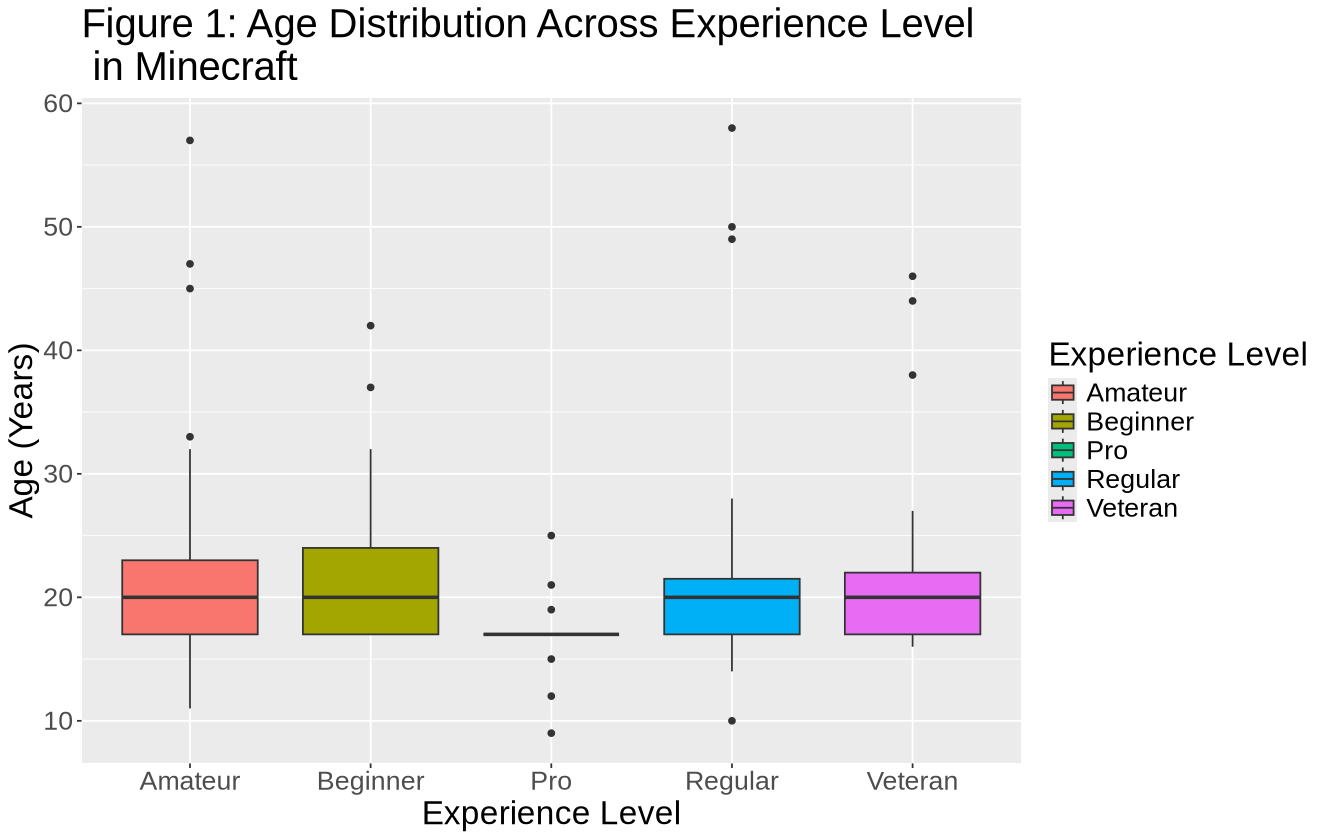

In [6]:
options(repr.plot.width = 11, repr.plot.height = 7)

age_experience_box_plot <- experience_report_data |>
    ggplot(aes(x = experience, y = Age, fill = experience)) +
    geom_boxplot() +
    labs(x = "Experience Level", y = "Age (Years)", fill = "Experience Level") +
    ggtitle("Figure 1: Age Distribution Across Experience Level \n in Minecraft") +
    theme(text = element_text(size = 20))
age_experience_box_plot

In Figure 1 we used a box plot to vizualize the distribution of ages across expirience levels. The box plot shows us the range of ages in each expirience group as well as the median age and any outliers in the catagory. The "Pro" expirence level is the most intresting as the group is so small it is comprised almost exclusivly of outliers. These outliers include the youngest point on our data set, being age 9. The pro catagory has the youngest median of the data set (17), and the oldest pro is only 25, the youngest maximum age of any group. Another notable aspect of the visualizatio is that the median of all four other groups is 20. The vizualization helps us understand how age is distributed across the expirence groups to better understand how age will be factored into the predictions.

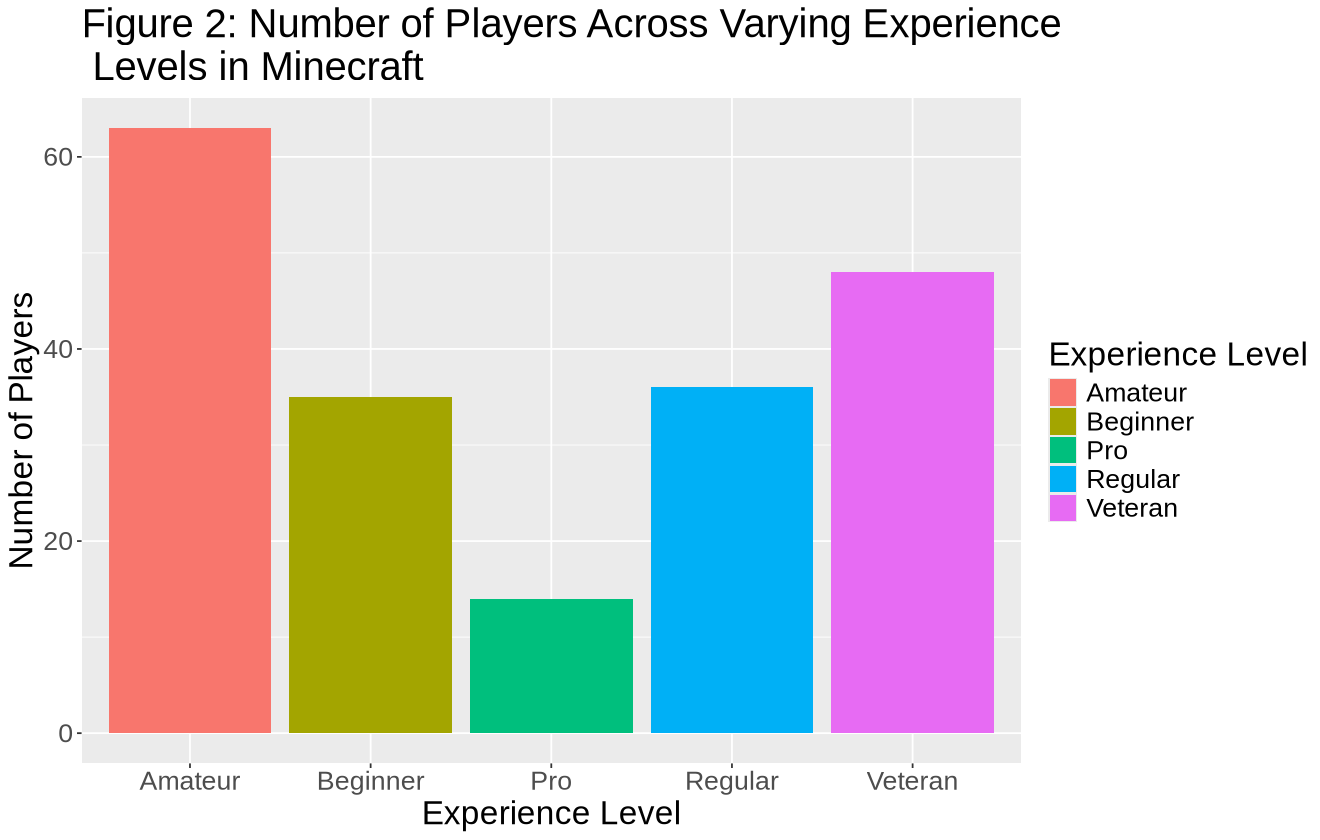

In [7]:
experience_bar_plot <- experience_report_data |>
    ggplot(aes(x = experience, fill = experience)) +
    geom_bar() +
    labs(x = "Experience Level", y = "Number of Players", fill = "Experience Level") +
    ggtitle("Figure 2: Number of Players Across Varying Experience \n Levels in Minecraft") +
    theme(text = element_text(size = 20))
experience_bar_plot

This plot shows the distribution of each player level. From most to least respectively, players reported that they are ‘Amateur’, ‘Veteran’, ‘Regular’, ‘Beginner’, and ‘Pro’. The most being ‘Amateur’ and the second being ‘Veteran’ tells us that there are a fair amount of both experienced and inexperienced players participating in the survey. There are roughly the same amount of ‘Regular’ and ‘Beginner’ that participated in the survey.  Knowing the amount of players in each experience level that participated in the survey can assist in better understanding how the uneven distribution can be an underlying bias that can influence our results.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


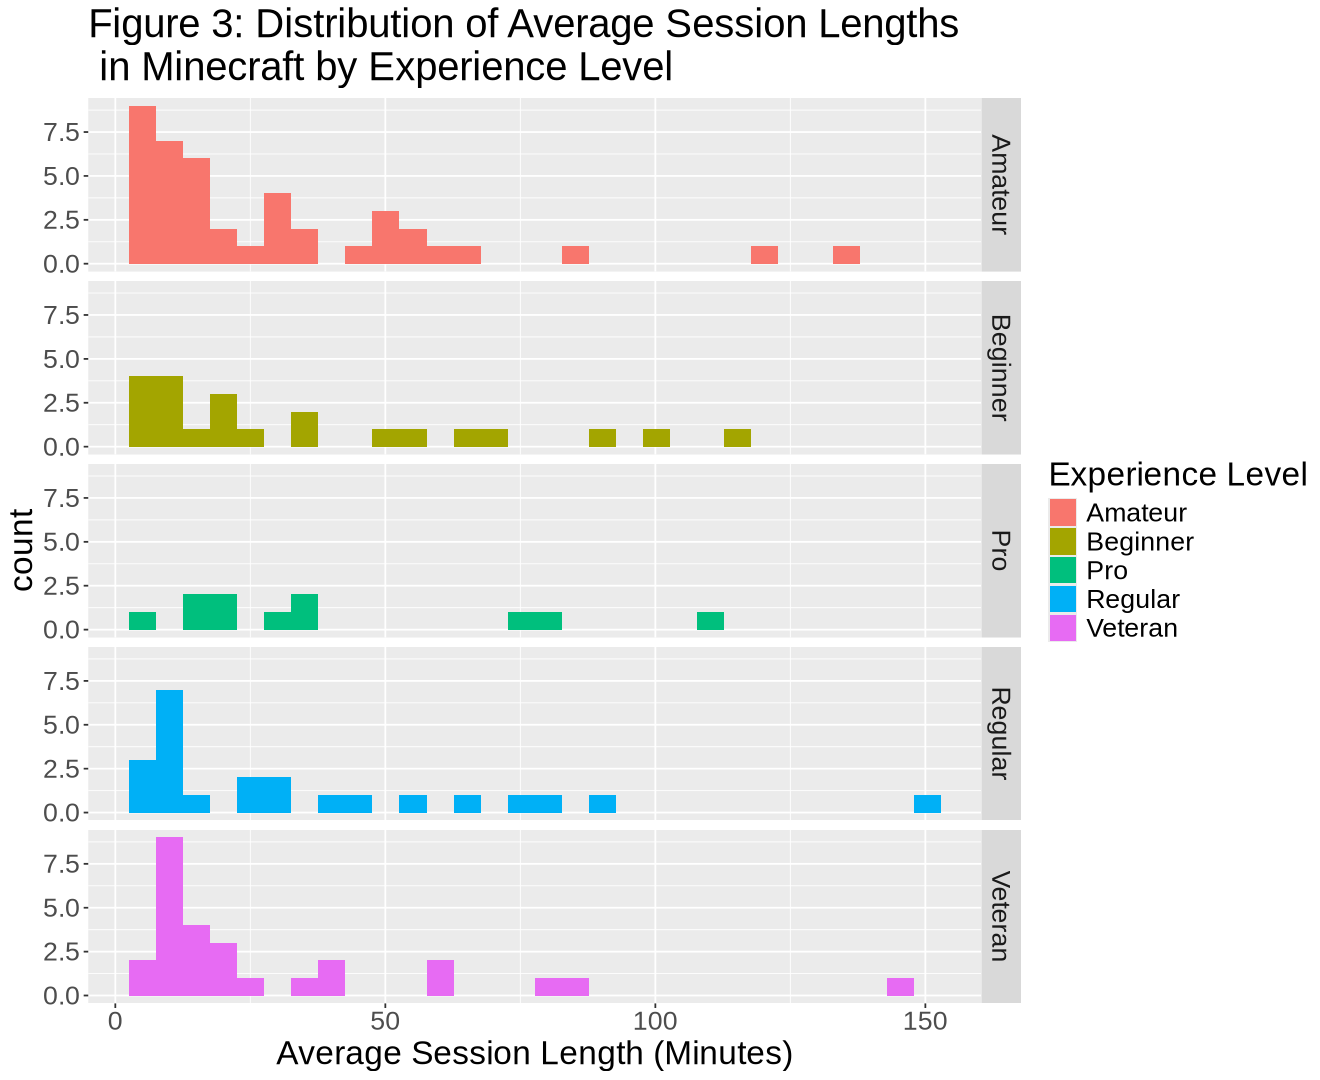

In [8]:
options(repr.plot.width = 11, repr.plot.height = 9)

exp_asl_histogram_plot <- experience_report_data |>
    ggplot(aes(x = average_session_length, fill = experience)) +
    geom_histogram(position = "identity") +
    facet_grid(rows = vars(experience)) +
    labs(x = "Average Session Length (Minutes)", fill = "Experience Level") +
    ggtitle("Figure 3: Distribution of Average Session Lengths \n in Minecraft by Experience Level") +
    theme(text = element_text(size = 20))
exp_asl_histogram_plot

This plot shows the average session length of players of different experience levels. As we can see, all five of the graphs are left-skewed. Most players have playing time under 60 minutes. The highest count in average session length for ‘Beginner’ and ‘Amateur’ are on the left of for ‘Regular’ and ‘Veteran’, which are on the left of for ‘Pro’. The underrepresentation of ‘Pro’ relatively to larger counts like ‘Amateur’ and ‘Veteran’ will likely influence our results.

Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


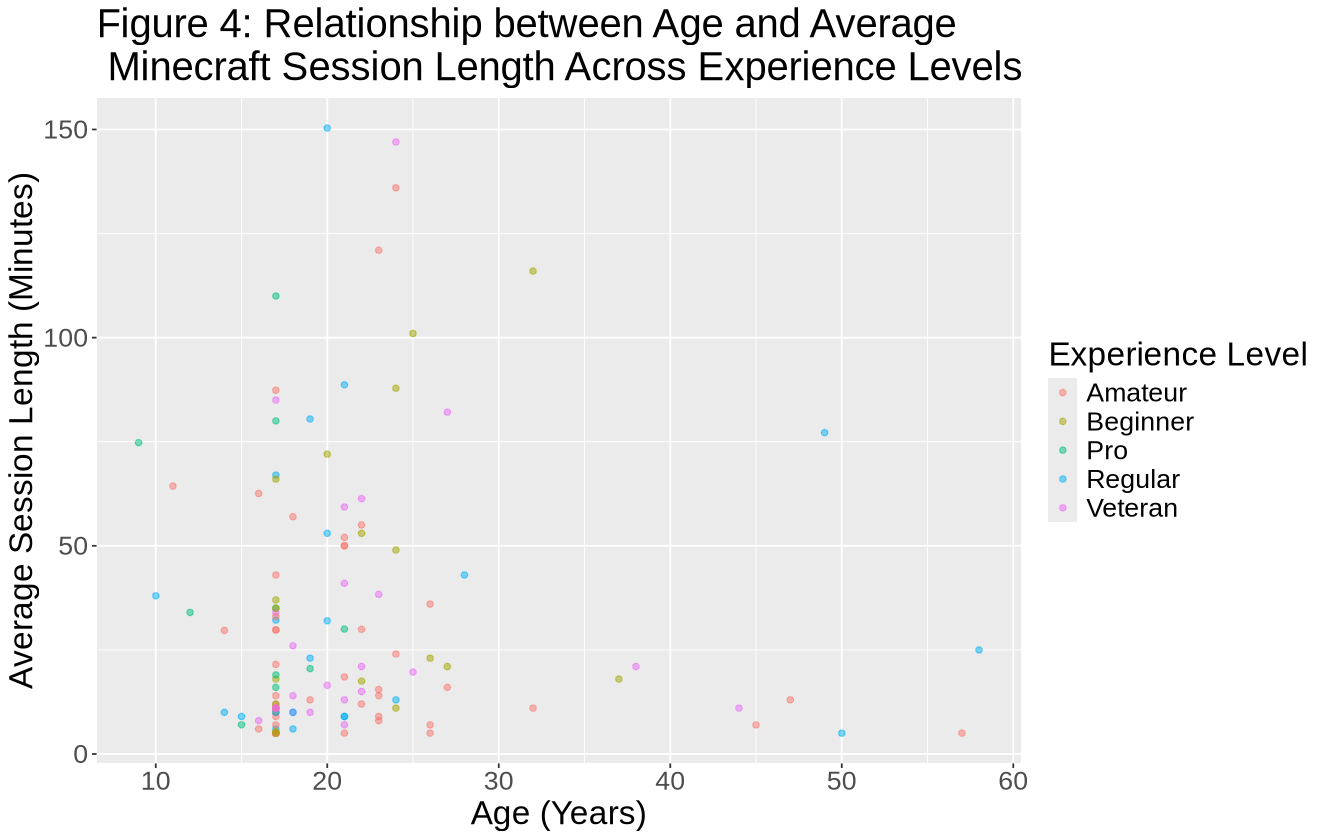

In [9]:
options(repr.plot.width = 11, repr.plot.height = 7)

asl_age_scatter_plot <- experience_report_data |>
    ggplot(aes(x = Age, y = average_session_length, color = experience)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (Years)", y = "Average Session Length (Minutes)", color = "Experience Level") +
    ggtitle("Figure 4: Relationship between Age and Average \n Minecraft Session Length Across Experience Levels") +
    theme(text = element_text(size = 20))
asl_age_scatter_plot

The scatter plot above shows a wide range of points. Just by seeing this graph, it is extremely difficult to idenitfy a certain relationship for experience in terms of average session length against age. Furthermore, there appears to be an abundance of points at the 15 to 25 years of age range. Additionally, all different types of experience levels scattered across the average session length spread can be seen from this range.
In conclusion, a certain relationship based on neither average session length or Age in relation to experience level cannot be confidently identified.

#### KNN Classification Model 

In [10]:
set.seed(2020)

experience_split <- initial_split(experience_report_data, prop = 0.75, strata = experience)  
experience_training <- training(experience_split)   
experience_testing <- testing(experience_split)

In [11]:
set.seed(2020)

experience_recipe <- recipe(experience ~ Age + average_session_length, data = experience_training) |>
   step_impute_median(Age, average_session_length) |>
   step_scale(Age, average_session_length) |>
   step_center(Age, average_session_length)
experience_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Median imputation for: Age and average_session_length

• Scaling for: Age and average_session_length

• Centering for: Age and average_session_length



In [12]:
set.seed(2020)

experience_knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

experience_vfold <- vfold_cv(experience_training, v = 5, strata = experience)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

In [13]:
set.seed(2020)

knn_results <- workflow() |>
  add_recipe(experience_recipe) |>
  add_model(experience_knn_tune) |>  
  tune_grid(resamples = experience_vfold, grid = k_vals) |>
  collect_metrics()

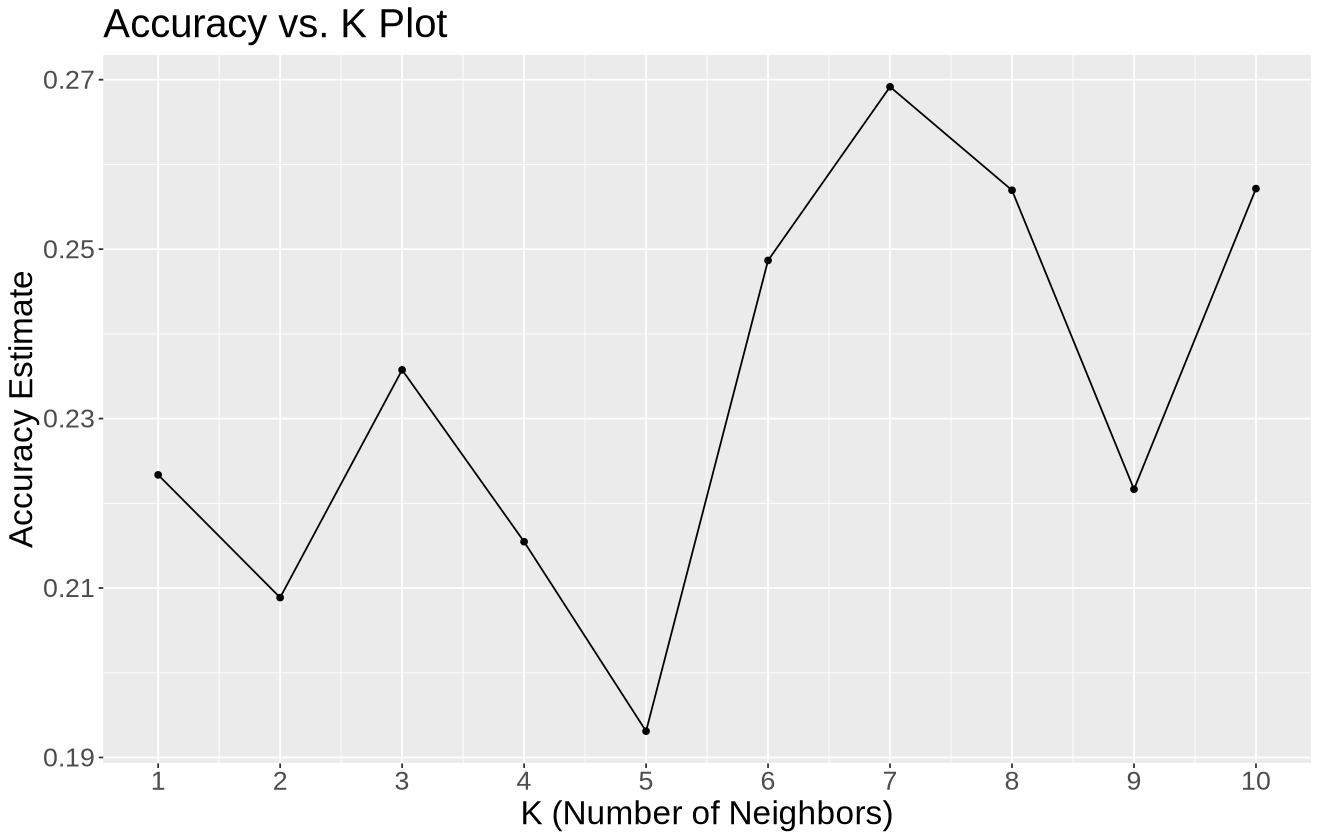

In [14]:
set.seed(2020)

k_accuracies <- knn_results |> 
    filter(.metric == "accuracy")

cross_val_plot <- k_accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "K (Number of Neighbors)", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 10, by = 1)) +
    ggtitle("Accuracy vs. K Plot") +
    theme(text = element_text(size = 20))
cross_val_plot

In [15]:
set.seed(2020)

experience_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
                set_engine("kknn") |>
                set_mode("classification")

experience_fit <- workflow() |>
                add_recipe(experience_recipe) |>
                add_model(experience_best_spec) |>
                fit(data = experience_training) 
experience_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_impute_median()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(7,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.662069
Best kernel: rectangular
Best k: 7

In [16]:
set.seed(2020)

experience_predictions <- predict(experience_fit, new_data = experience_testing) |>
                        bind_cols(experience_testing)

experience_metrics <- experience_predictions |>
                    metrics(truth = experience, estimate = .pred_class) |>
                    filter(.metric == "accuracy")
experience_metrics

experience_conf_mat <- conf_mat(experience_predictions, truth = experience, estimate = .pred_class)
experience_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.2352941


          Truth
Prediction Amateur Beginner Pro Regular Veteran
  Amateur       10        6   1       6       7
  Beginner       4        2   0       2       6
  Pro            0        0   0       0       0
  Regular        2        0   0       0       0
  Veteran        0        2   1       2       0